# Pixel importances with a parallel forest of trees

This example shows the use of a forest of trees to evaluate the impurity based importance of the pixels in an image classification task on the faces dataset. The hotter the pixel, the more important it is.

The code below also illustrates how the construction and the computation of the predictions can be parallelized within multiple jobs.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

n_jobs = -1
data = fetch_olivetti_faces()
X, y = data.data, data.target

# limit dataset to 5 classes
mask = y < 5
X = X[mask]
y = y[mask]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs, random_state=42)

forest.fit(X, y)

RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

**Feature importance based on mean decrease in impurity (MDI)**

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

> Warning: Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative.

Elapsed time to compute the importances: 0.457 seconds


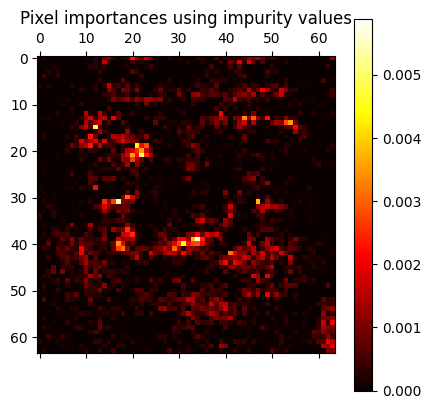

In [3]:
import time

import matplotlib.pyplot as plt

start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

Can you still recognize a face?

The limitations of MDI is not a problem for this dataset because:

> 1. All features are (ordered) numeric and will thus not suffer the cardinality bias
2. We are only interested to represent knowledge of the forest acquired on the training set.

If these two conditions are not met, it is recommended to instead use the permutation_importance.